### Importação das bibliotecas a serem utilizadas


In [111]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Importação do nosso Banco de Dados

In [112]:
file = '/content/Aula 7 - Dados_Desafio_Previsao_Vendas.xlsx'
df = pd.read_excel(file, parse_dates = True)

### Visualização dos nossos dados

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16690 entries, 0 to 16689
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   VENDEDOR           16690 non-null  float64
 1   CLIENTE            16690 non-null  float64
 2   PRODUTO            16690 non-null  float64
 3   QUANTIDADE         16690 non-null  float64
 4   UNIDADE_MEDIDA_NF  16690 non-null  object 
 5   PREÇO_NF           16690 non-null  float64
 6   DATA_NF            16690 non-null  object 
 7   CRP_AJUSTADO       16690 non-null  float64
 8   VLR_PRECO_LISTA    16690 non-null  object 
 9   VLR_CONTRIBUICAO   16690 non-null  float64
dtypes: float64(7), object(3)
memory usage: 1.3+ MB


In [114]:
df.head()

,VENDEDOR,CLIENTE,PRODUTO,QUANTIDADE,UNIDADE_MEDIDA_NF,PREÇO_NF,DATA_NF,CRP_AJUSTADO,VLR_PRECO_LISTA,VLR_CONTRIBUICAO
0,380.0,38797.0,254.0,30155.0,KGS,10.795,2010-06-19 00:00:00,5.287059,12.8843,166091.966200
1,379.0,36022.0,963.0,13149.0,KGS,5.780,2010-05-23 00:00:00,3.318824,6.0632,32362.009410
2,385.0,23397.0,1158.0,4602.0,KGS,11.300,2010-03-08 00:00:00,7.872941,14.4001,15771.324710
3,422.0,15430.0,112.0,13850.0,KGS,3.926,2010-04-26 00:00:00,3.911765,7.15,197.158824
4,380.0,6319.0,69.0,5347.0,KGS,44.390,2009-08-24 00:00:00,4.109412,10.01,215380.305300


In [115]:
df.describe()

,VENDEDOR,CLIENTE,PRODUTO,QUANTIDADE,PREÇO_NF,CRP_AJUSTADO,VLR_CONTRIBUICAO
count,16690.000000,16690.000000,16690.000000,16690.000000,16690.000000,16690.000000,16690.000000
mean,354.920132,21781.291072,353.885321,1498.689455,22.712701,8.808834,8841.444155
std,42.349895,10531.812495,470.760665,3105.141894,69.610306,22.542751,22624.107889
min,47.000000,13.000000,1.000000,0.000000,0.910000,0.584706,-6871.449412
25%,324.000000,12748.000000,60.000000,219.000000,6.136000,2.552941,1452.670721
50%,335.000000,23390.000000,121.000000,525.000000,9.867000,4.068235,3048.211294
75%,389.000000,30531.000000,411.000000,1446.000000,17.810000,7.179118,7559.073706
max,445.000000,39214.000000,1649.000000,53630.000000,1464.359000,669.092941,397882.403600


In [116]:
# Convertendo os tipos das nossas colunas

df['PRODUTO'] = df['PRODUTO'].astype(str)
df['CLIENTE'] = df['CLIENTE'].astype(str)
df['VENDEDOR'] = df['VENDEDOR'].astype(str)
df['QUANTIDADE'] = df['QUANTIDADE'].astype(int)

In [117]:
# Agrupando por grupos diferentes do que é número e letras

df_numerico = df.columns[df.dtypes != 'object']
df_categorico = df.columns[df.dtypes == 'object']

In [118]:
# Transformando o tipo da nossa coluna em Datetime

df['DATA_NF']= pd.to_datetime(df['DATA_NF'], format='%Y-%m-%d', errors='coerce')

In [119]:
# Normalização da nossa variável

for coluna in df_categorico:
  Analise = df[coluna].value_counts(normalize=True)*100
  print(coluna)
  print(Analise)
  print('')

VENDEDOR
324.0    12.258838
328.0    10.934691
318.0     9.448772
326.0     8.466147
344.0     8.454164
371.0     8.304374
389.0     8.250449
402.0     5.416417
335.0     4.337927
319.0     4.230078
401.0     2.768125
413.0     2.618334
377.0     2.240863
425.0     2.061114
431.0     1.635710
430.0     1.605752
385.0     1.138406
399.0     0.665069
443.0     0.605153
397.0     0.431396
417.0     0.407430
432.0     0.317555
422.0     0.317555
400.0     0.311564
411.0     0.299581
108.0     0.281606
426.0     0.263631
409.0     0.233673
427.0     0.209706
47.0      0.209706
420.0     0.149790
421.0     0.149790
390.0     0.143799
445.0     0.107849
435.0     0.107849
428.0     0.101857
441.0     0.065908
340.0     0.059916
437.0     0.059916
440.0     0.053925
416.0     0.035950
65.0      0.029958
384.0     0.029958
380.0     0.023966
407.0     0.023966
438.0     0.023966
423.0     0.017975
436.0     0.017975
177.0     0.017975
356.0     0.011983
211.0     0.011983
225.0     0.005992
331

In [120]:
# Mostrando apenas o que é "LT (Litros)"

df_lt = df.loc[df['UNIDADE_MEDIDA_NF'] == 'LT']

df_lt

,VENDEDOR,CLIENTE,PRODUTO,QUANTIDADE,UNIDADE_MEDIDA_NF,PREÇO_NF,DATA_NF,CRP_AJUSTADO,VLR_PRECO_LISTA,VLR_CONTRIBUICAO
160,401.0,24596.0,1128.0,1753,LT,6.604,2009-12-17,4.471765,9.5381,3737.808471
166,401.0,24596.0,1128.0,1753,LT,6.487,2010-01-02,4.372941,9.3236,3705.945118
197,401.0,24596.0,1128.0,1753,LT,6.487,2010-01-03,4.232941,9.0233,3951.365118
198,324.0,24501.0,681.0,7012,LT,5.759,2009-05-09,3.491765,7.3931,15897.853880
243,401.0,24596.0,1128.0,1402,LT,6.448,2010-01-08,4.216471,9.009,3128.604235
...,...,...,...,...,...,...,...,...,...,...
15063,344.0,2702.0,681.0,2805,LT,8.892,2010-06-25,3.360000,7.3788,15517.260000
15107,344.0,2702.0,681.0,2805,LT,9.087,2010-08-05,3.425882,7.5075,15879.435000
15167,344.0,2702.0,681.0,2805,LT,9.477,2010-09-04,3.565882,7.8221,16580.685000
15203,402.0,23390.0,1431.0,5259,LT,4.888,2010-03-18,1.770588,5.7057,16394.468470


### Visualização dos Dados em Gráficos

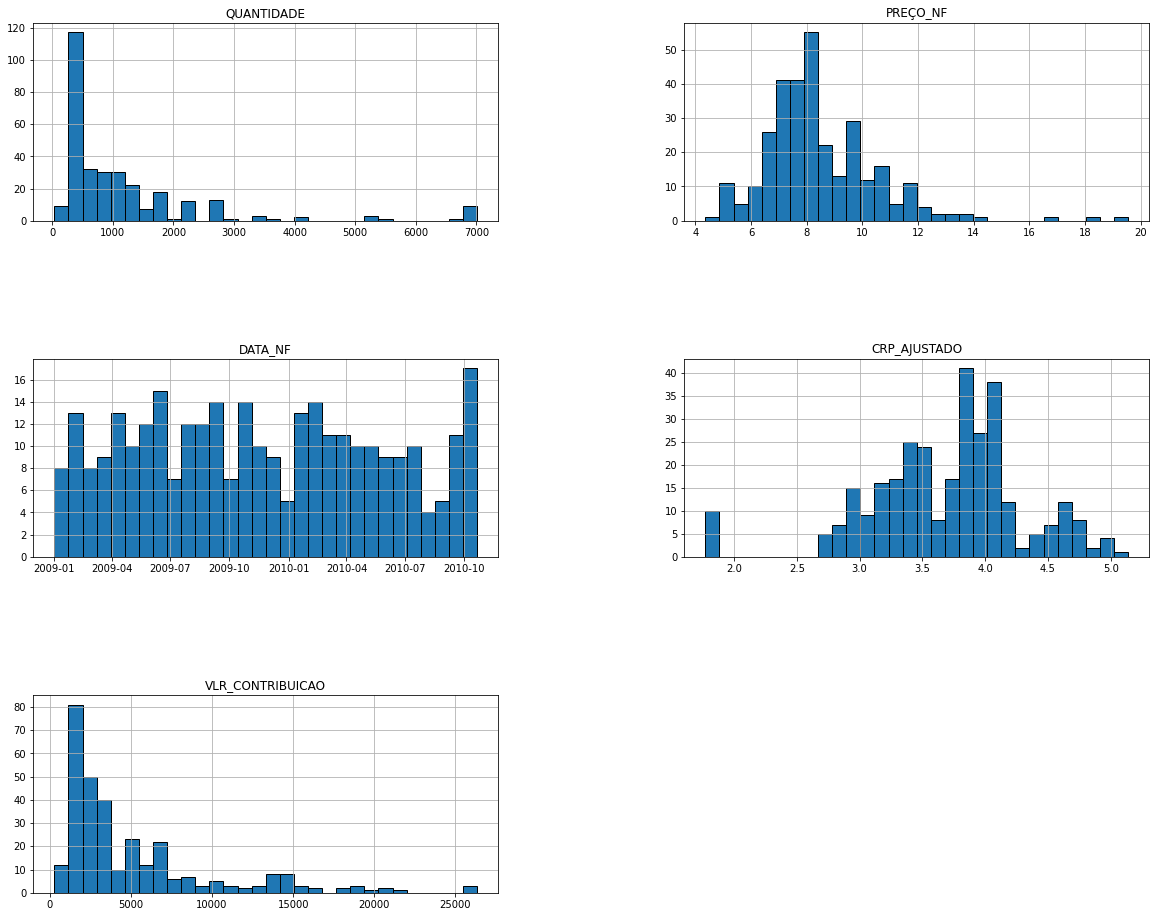

In [121]:
# Plotando nosso histograma

df_lt.hist(figsize=(20, 16), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [122]:
# Agrupando por grupos diferentes do que é número e letras

df_numerico = df_lt.columns[df.dtypes != 'object']
df_categorico= df_lt.columns[df.dtypes == 'object']

In [123]:
# Removendo a coluna "DATA_NF"
df_numerico = df_numerico.drop(['DATA_NF'])

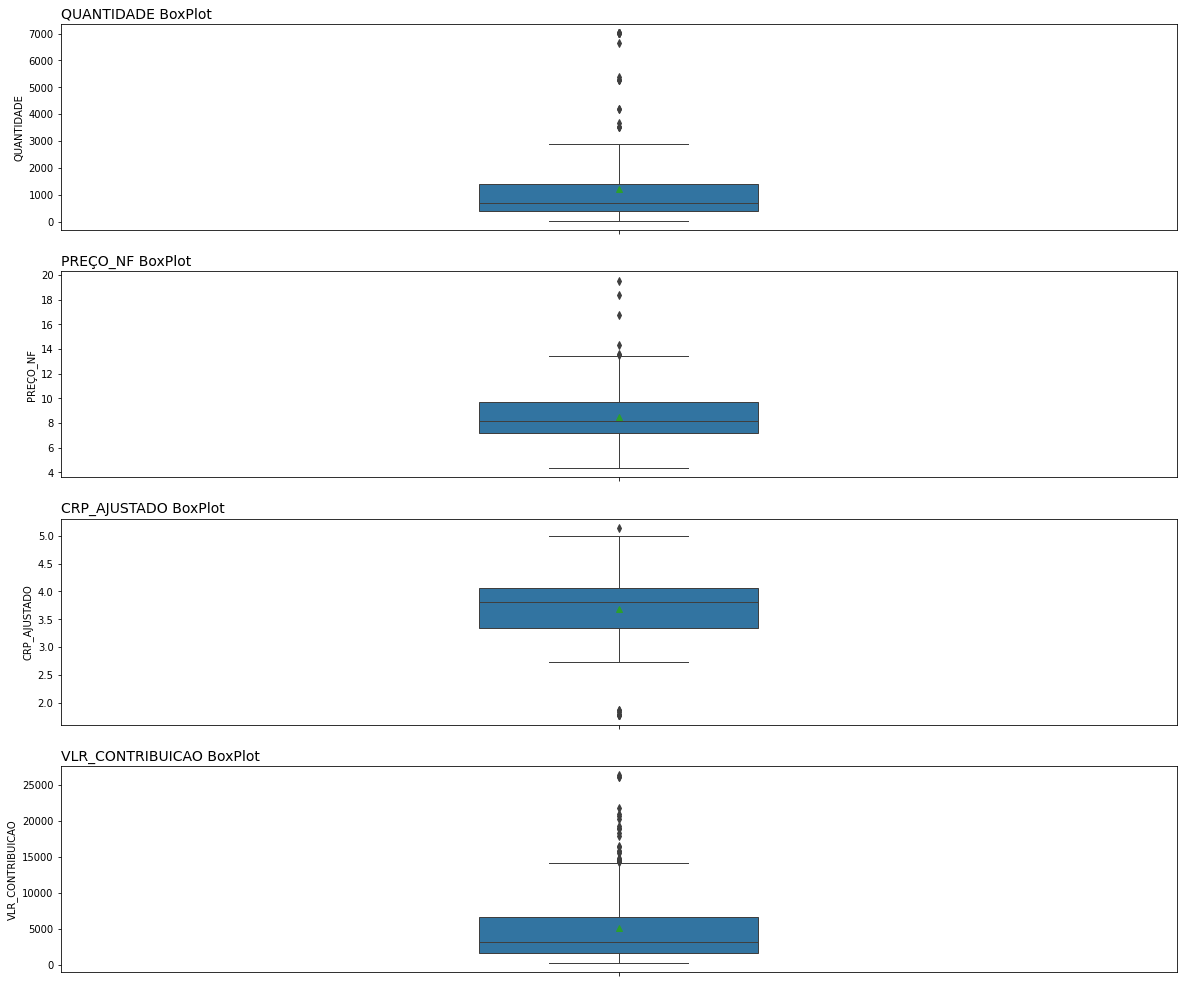

In [124]:
Linhas = 5 # Todas as infos numéricas
Colunas = 1 # Boxplot e displot
Posicao = 1
Figura, Eixo = plt.subplots(figsize=(20,22))

for Coluna in df_numerico:

  # Plot
  plt.subplot(Linhas, Colunas, Posicao)

  # Título
  plt.title(f'{Coluna} BoxPlot', loc = 'left', fontsize = 14, fontweight = 200)

  # BoxPlot
  sns.boxplot(data=df_lt, y=Coluna, showmeans = True, saturation = 0.75, linewidth = 1, width = 0.25)

  # Mudar
  Posicao += 1

In [125]:
# Ajustando a data numa nova coluna para que fique em Mês e Ano
df_lt['Mes'] = df_lt['DATA_NF'].dt.strftime('%Y-%m')

df_lt['Ano'] = df_lt['DATA_NF'].dt.strftime('%Y')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [126]:
df_ano = df_lt.groupby(by=["Mes",'PRODUTO', 'Ano'], dropna=False).sum()

In [127]:
# Agrupando a nossa variável pelo "Ano" de 2009 
df_2009 = df_lt.loc[df_lt['Ano'] == '2009']
df_2009 = df_2009.groupby(by=["Mes",'PRODUTO', 'Ano'], dropna=False).sum()

df_2009

QUANTIDADE  PREÇO_NF  CRP_AJUSTADO  VLR_CONTRIBUICAO
Mes     PRODUTO Ano                                                       
2009-01 1128.0  2009        1369    36.244     12.682353       8905.538294
        681.0   2009       10176    68.627     32.496471      40742.494412
2009-02 1128.0  2009         394     9.776      2.890588       2712.852235
        681.0   2009        6397    73.736     31.112941      27207.732470
2009-03 1128.0  2009        2364    29.731     12.896471       8867.155411
        681.0   2009       10693    96.967     38.343529      46573.225184
2009-04 1128.0  2009        3152    49.465     23.898824      11794.923058
        681.0   2009        9712    53.651     25.348235      40833.007712
2009-05 1128.0  2009        6000    51.064     25.875294      18000.702529
        681.0   2009       15199    78.975     37.503529      52928.334941
2009-06 1128.0  2009        7786    78.858     40.221176      25777.662765
        681.0   2009        7131    81.107     32.685882      35330.594764
2009-07 1128.0  2009        7298    49.296     22.918824      27948.321352
        681.0   2009       12744    41.054     17.376471      48517.531061
2009-08 1128.0  2009        3940    64.584     26.542353      18850.118824
        681.0   2009        8672   115.245     42.354118      46118.487059
2009-09 1128.0  2009        8879    46.228     21.181176      32336.464114
        681.0   2009       19520    78.065     30.503529      83378.995648
2009-10 1128.0  2009         788    21.255      7.444706       5441.255882
        1431.0  2009        1051     4.355      1.770588       2716.216765
        681.0   2009       14342   125.242     49.032941      59641.701121
2009-11 1128.0  2009         808    15.600      7.535294       3247.495294
        681.0   2009       13220    91.052     38.187059      63272.321704
2009-12 1128.0  2009        2868    21.034     12.649412       7047.446059
        681.0   2009        7130    43.615     17.623529      36754.133530

In [128]:
# Agrupando a nossa variável pelo "Ano" de 2010

df_2010 = df_lt.loc[df_lt['Ano'] == '2010']
df_2010 = df_2010.groupby(by=["Mes",'PRODUTO', 'Ano'], dropna=False).sum()

df_2010

QUANTIDADE  PREÇO_NF  CRP_AJUSTADO  VLR_CONTRIBUICAO
Mes     PRODUTO Ano                                                       
2010-01 1128.0  2010        9782    70.083     37.882353      33665.954351
        681.0   2010        9471    77.805     32.200000      46485.672411
2010-02 1128.0  2010        3632    25.480     12.912941      17177.505885
        1431.0  2010       14724    24.440      9.034118      45265.566106
        681.0   2010       13617    58.578     26.937647      50991.225294
2010-03 1128.0  2010        4558    53.196     27.234118      16062.343116
        1431.0  2010        5259     4.888      1.770588      16394.468470
        681.0   2010        6492    71.630     33.600000      32774.575117
2010-04 1128.0  2010        8988    60.242     28.403529      41079.027707
        681.0   2010       24558   108.628     50.852941     100861.321878
2010-05 1128.0  2010        3218    30.342     14.255294      16774.078235
        681.0   2010       11455    79.989     34.349412      56306.937993
2010-06 1128.0  2010        1243    21.047      9.091765       7455.188589
        1431.0  2010        4908     9.776      3.541176      15300.256937
        681.0   2010       17824    73.398     30.816471      79031.490289
2010-07 1128.0  2010        3225    52.546     20.580000      19644.732824
        681.0   2010       10159    70.031     25.834118      49485.716704
2010-08 1128.0  2010        2073    21.658      7.700000      14142.448765
        681.0   2010        6079    40.742     16.297647      36849.973467
2010-09 1128.0  2010        7877    55.887     28.255294      23469.399765
        681.0   2010       12859    82.784     32.982353      72171.394468
2010-10 1128.0  2010        4365    55.367     25.512941      20889.999824
        1431.0  2010        1753     4.875      1.836471       5326.542059
        681.0   2010        9973    64.077     28.881176      42441.680173

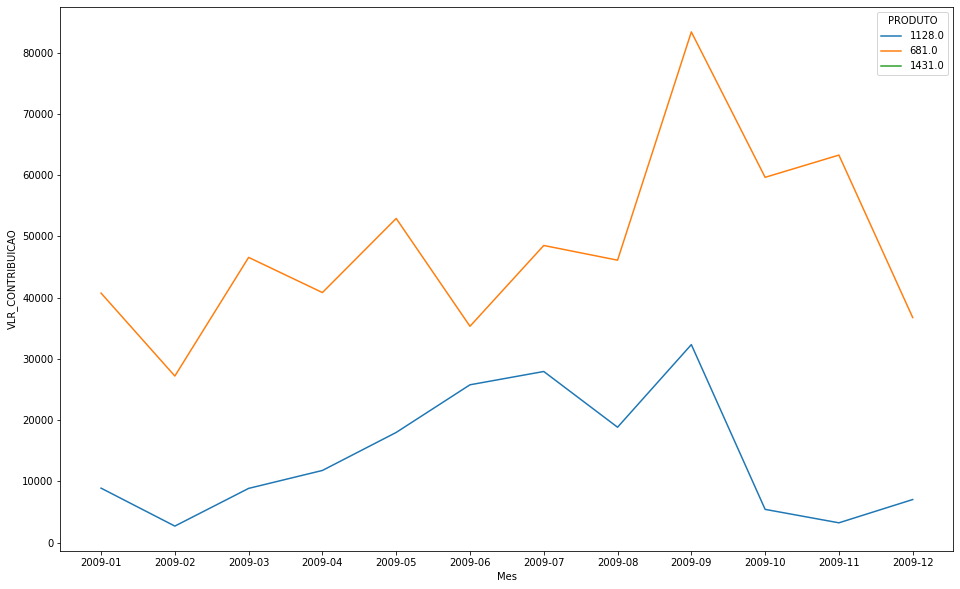

In [129]:
Figura, Eixo = plt.subplots(figsize=(16,10))
sns.lineplot(x="Mes", y="VLR_CONTRIBUICAO", data=df_2009, hue = 'PRODUTO');

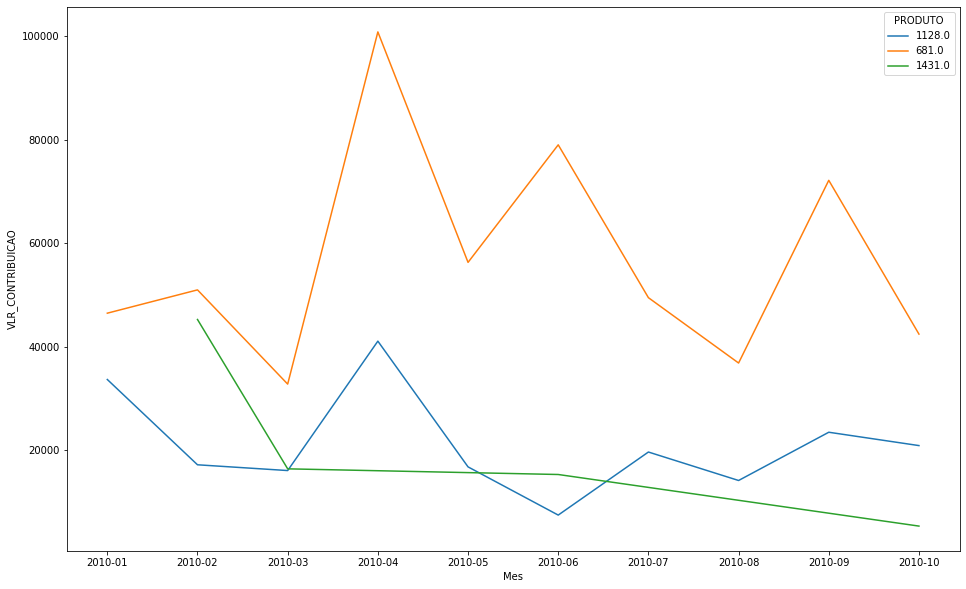

In [130]:
Figura, Eixo = plt.subplots(figsize=(16,10))
sns.lineplot(x="Mes", y="VLR_CONTRIBUICAO", data=df_2010, hue = 'PRODUTO');

In [131]:
df_lt['UNIDADE_MEDIDA_NF'] = df_lt['UNIDADE_MEDIDA_NF'].replace(['LT'],[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [132]:
# Removendo as colunas
df_lt = df_lt.drop(columns=['VENDEDOR', 'CLIENTE', 'UNIDADE_MEDIDA_NF', 'DATA_NF', 'Mes', 'Ano', 'PRODUTO'])

# Convertendo o tipo da coluna
df_lt['VLR_PRECO_LISTA'] = df_lt['VLR_PRECO_LISTA'].astype(float)

# Visualizando o tipo das nossas colunas
df_lt.dtypes

QUANTIDADE            int64
PREÇO_NF            float64
CRP_AJUSTADO        float64
VLR_PRECO_LISTA     float64
VLR_CONTRIBUICAO    float64
dtype: object

In [133]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(df_lt)

dataset=pd.DataFrame(scaler.transform(df_lt),columns=df_lt.columns)

dataset.head()

,QUANTIDADE,PREÇO_NF,CRP_AJUSTADO,VLR_PRECO_LISTA,VLR_CONTRIBUICAO
0,0.246238,0.147990,0.801956,0.463902,0.132643
1,0.246238,0.140291,0.772616,0.440860,0.131420
2,0.246238,0.140291,0.731051,0.408602,0.140839
3,1.000000,0.092387,0.511002,0.233487,0.599336
4,0.195929,0.137725,0.726161,0.407066,0.109262


In [134]:
# Apagando as colunas que não serão utililizadas no modelo:

x = df_lt.drop(columns=['VLR_CONTRIBUICAO'])
y = df_lt['VLR_CONTRIBUICAO']

### Visualização dos Nossos Testes

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import os
from sklearn.model_selection import train_test_split

In [136]:
xtreino, xteste, ytreino, yteste = train_test_split(x, y, test_size = 0.3, random_state = 42)

xtreino = sm.add_constant(xtreino) # add uma constante para que possamos estimar o valor do intercepto (beta0)

modelo = sm.OLS(ytreino, xtreino).fit() #modelo e seu ajuste

resultados = modelo.summary()

print(resultados)

                            OLS Regression Results                            
Dep. Variable:       VLR_CONTRIBUICAO   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     618.2
Date:                Mon, 17 Oct 2022   Prob (F-statistic):          5.94e-116
Time:                        19:01:43   Log-Likelihood:                -1901.3
No. Observations:                 218   AIC:                             3813.
Df Residuals:                     213   BIC:                             3830.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -3076.4913    636.145     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Text(0, 0.5, 'Predict values for Linear Regression')

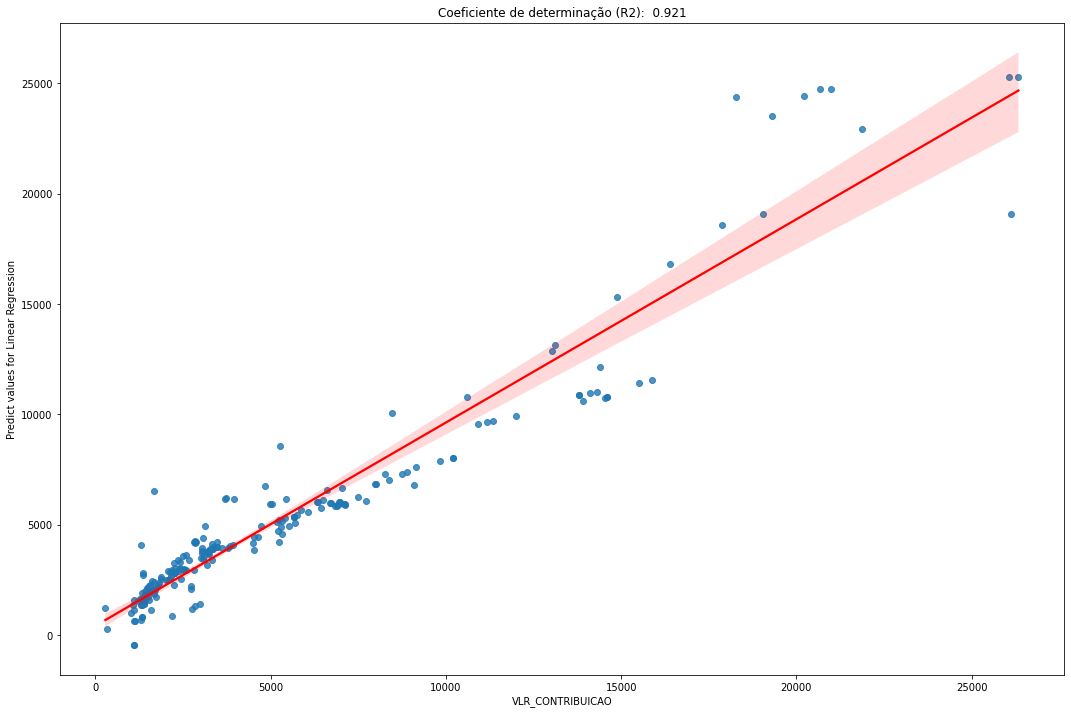

In [137]:
Figura, Eixo = plt.subplots(figsize=(18,12))

y_predict = modelo.predict(xtreino)
sns.regplot(x=ytreino,y=y_predict,line_kws={"color": "red"})
plt.title(f"Coeficiente de determinação (R2): {modelo.rsquared: .3f}")
plt.ylabel("Predict values for Linear Regression")

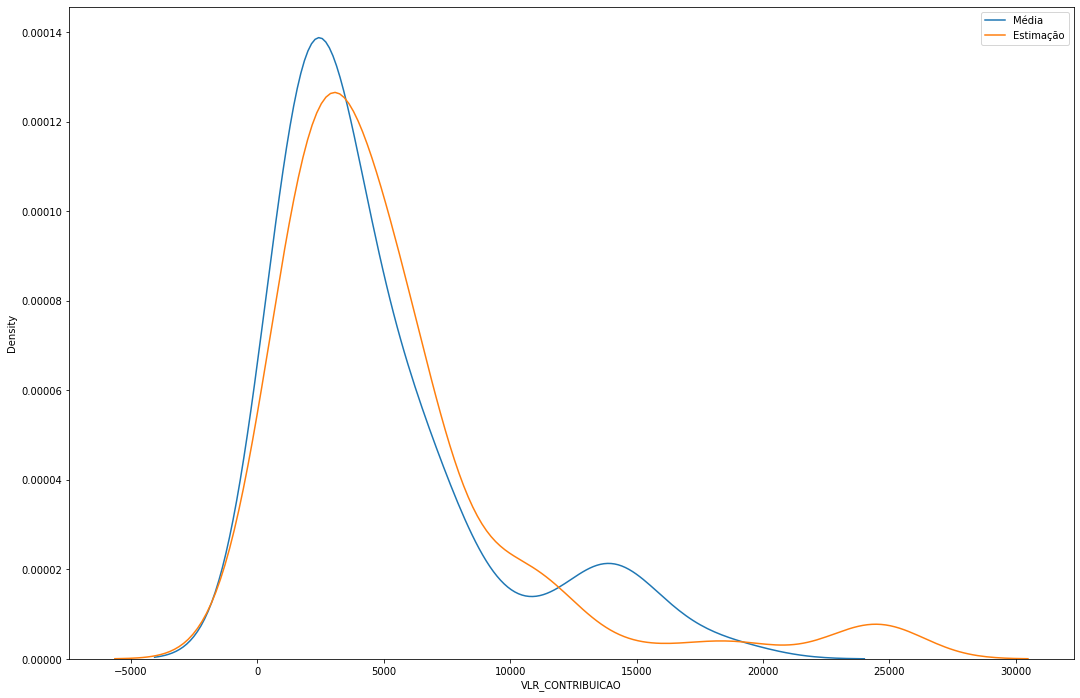

In [138]:
#Curva real x estimado
Figura, Eixo = plt.subplots(figsize=(18,12))

sns.kdeplot(x=yteste)
sns.kdeplot(x=y_predict)
plt.legend(['Média','Estimação'])

In [139]:
# Fazendo a nossa predição

modelopredict = modelo.predict([[1, 1000, 8.0, 4.0, 9.0]])

modelopredict

array([4286.08416556])

In [140]:
df_lt.head()

,QUANTIDADE,PREÇO_NF,CRP_AJUSTADO,VLR_PRECO_LISTA,VLR_CONTRIBUICAO
160,1753,6.604,4.471765,9.5381,3737.808471
166,1753,6.487,4.372941,9.3236,3705.945118
197,1753,6.487,4.232941,9.0233,3951.365118
198,7012,5.759,3.491765,7.3931,15897.853880
243,1402,6.448,4.216471,9.0090,3128.604235


In [141]:
classifier = LogisticRegression(max_iter=10000)

In [142]:
df_lt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 160 to 15617
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   QUANTIDADE        312 non-null    int64  
 1   PREÇO_NF          312 non-null    float64
 2   CRP_AJUSTADO      312 non-null    float64
 3   VLR_PRECO_LISTA   312 non-null    float64
 4   VLR_CONTRIBUICAO  312 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 14.6 KB


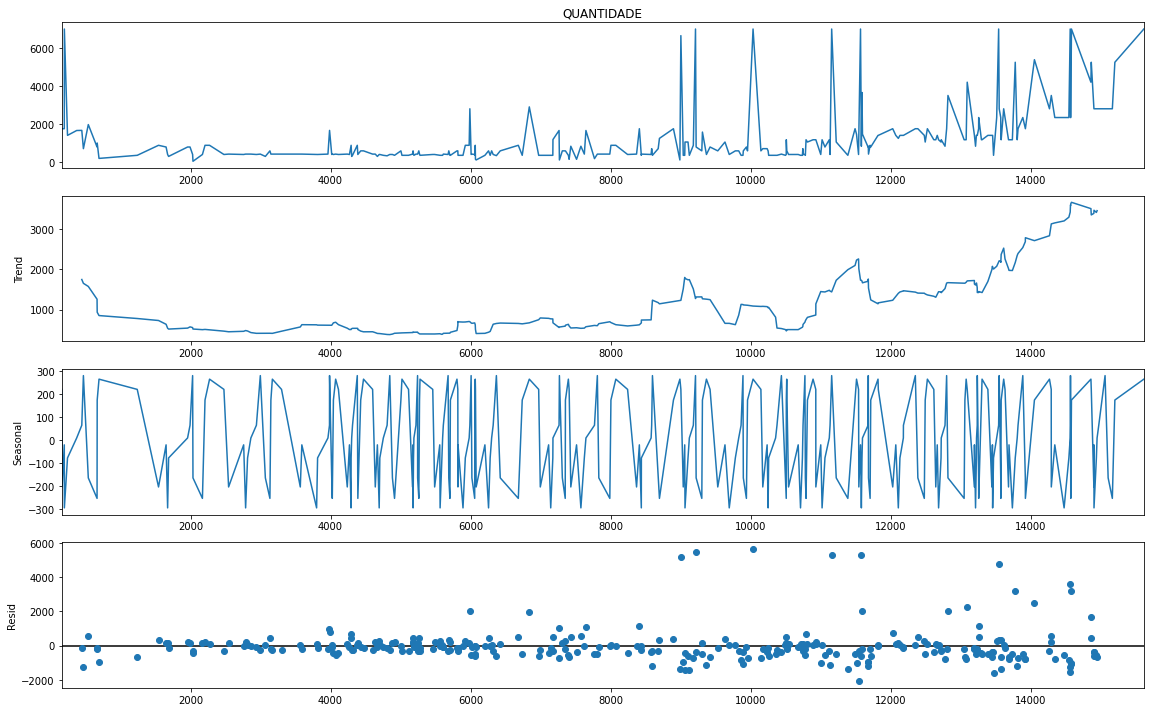

In [143]:
# Biblioteca para fazer a nossa decomposição
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(df_lt['QUANTIDADE'], period=12)

# Plot decomposition
fig = decomp.plot();
fig.set_size_inches((16, 10))
plt.tight_layout();

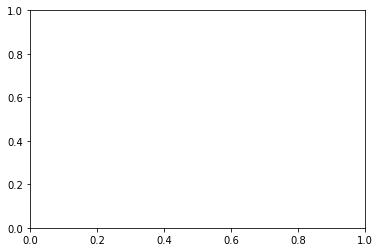

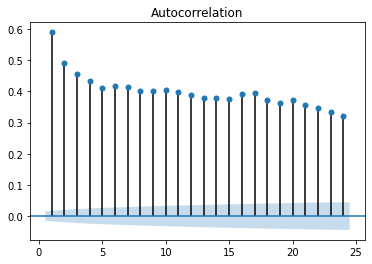

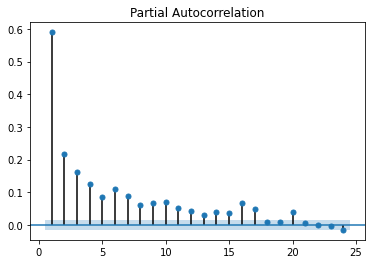

In [144]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure and subplot
fig, ax1 = plt.subplots()

# Plot the ACF on ax1
plot_acf(df['QUANTIDADE'], lags=24, zero=False);
plot_pacf(df['QUANTIDADE'], lags=24, zero=False);